# DATA ANALYSIS PROJECT:
   
   ###### delmas fouegap

## **PROBLEMA AZIENDALE :**
*Un'azienda vuole comprendere le interazioni tra i suoi **prodotti**, le **performance regionali** e i **margini** per ottimizzare le sue strategie di vendita.*  
(*A company wants to understand the interactions between its **products**, **regional performance**, and **margins** to optimize its sales strategies.*
)

Importazione delle librerie necessarie per l'analisi:

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Impostazione dello stile predefinito per i grafici

plt.style.use('ggplot')
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (10,6)
%matplotlib inline

Prima visualizzazione del dataset per avere un'idea delle diverse variabili :

In [3]:
df = pd.read_csv(r"C:\Users\delma\OneDrive\Bureau\yomiDenzel\Projet_1 Data-Analytics\Sample - Superstore.csv", encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Il nome delle diverse variabili:

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### -*Ci sono valori mancanti o incoerenti ?*

In [5]:

df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


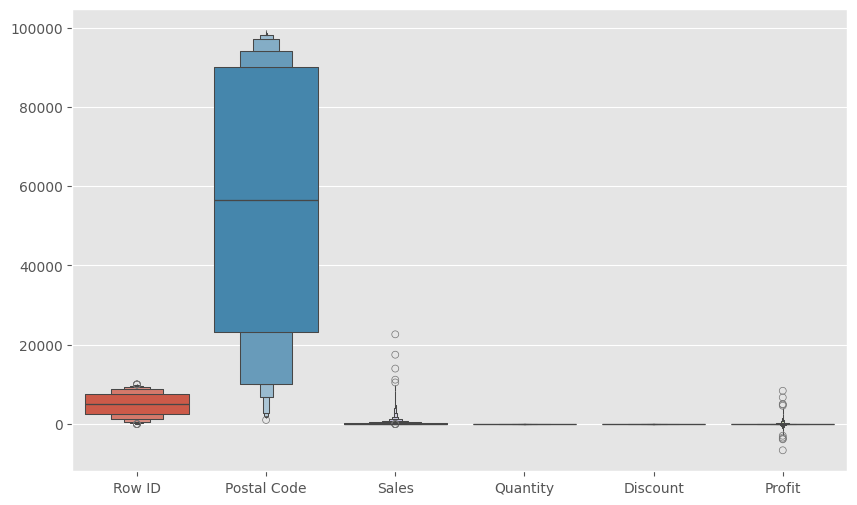

In [7]:
sns.boxenplot(data=df)
plt.show()

> Grazie ai boxplot, possiamo vedere qui che la variabile **Sales** presenta una forte dispersione con diversi valori estremi, mentre la **Profit** rimane globalmente concentrata attorno ai suoi valori centrali, sebbene siano presenti alcuni valori anomali.

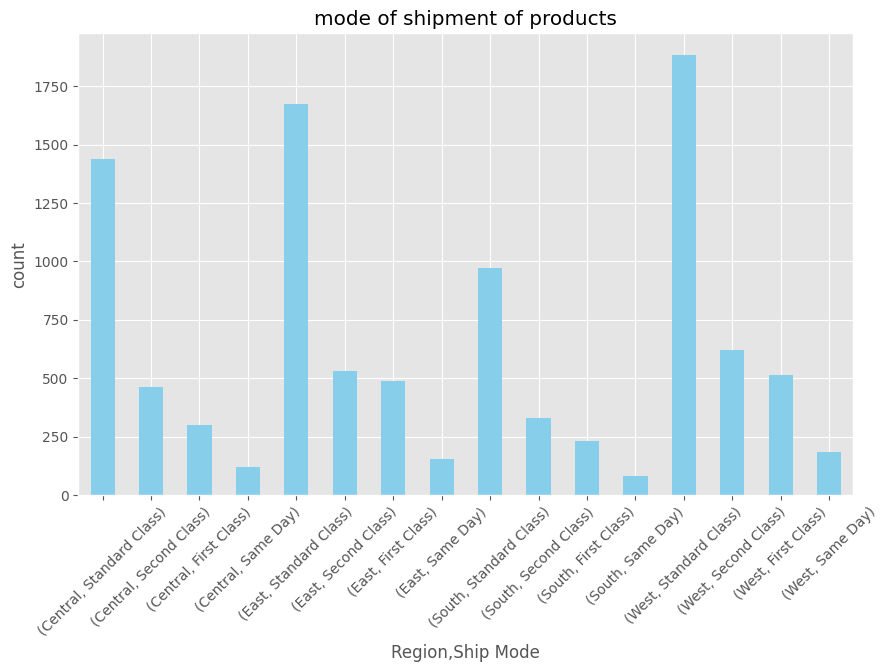

In [8]:
plt.Figure(figsize=(10,6))
df.groupby("Region")["Ship Mode"].value_counts().plot(kind="bar", title="mode of shipment of products",color="skyblue")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

> ###  Metodo di consegna per regione
>- In tutte le regioni, la **Classe Standard** prevale ampiamente → preferenza generale per il metodo più economico.
>- L'**Ovest** è la regione in cui la Classe Standard è più utilizzata (~1.900 spedizioni).
>- La **Consegna in giornata** rimane marginale in tutte le regioni, particolarmente bassa nel **Sud**.
>- I metodi intermedi (**Seconda Classe** e **Prima Classe**) presentano una distribuzione equilibrata, con una leggera sovrarappresentazione nell'**Est** e nell'**Ovest**.
>➡️ **Conclusione:** Le preferenze logistiche sono coerenti in tutte le regioni: forte ricorso alla **Classe Standard**, utilizzo marginale della **Consegna in giornata**. Ciò > suggerisce che la velocità di consegna non è un criterio chiave per la maggior parte dei clienti, indipendentemente dalla regione.

## **Analisi delle prestazioni regionali :**

#### -*Quali sono le regioni più/meno redditizie?*

Region
South      241.803645
East       238.336110
West       226.493233
Central    215.772661
Name: Sales, dtype: float64


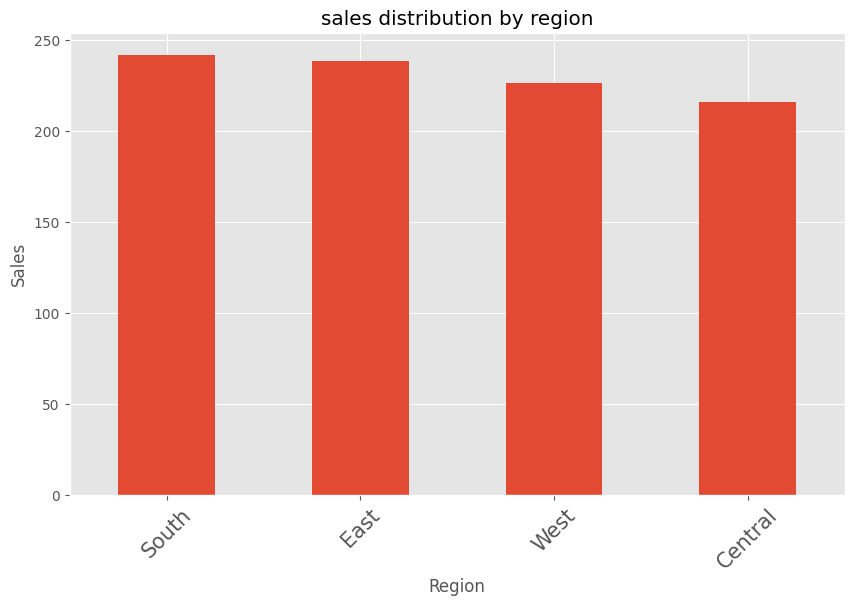

In [9]:
## Quali regioni generano il maggior numero di vendite?

df["Region"].value_counts()
most_vend = df.groupby("Region")["Sales"].mean().sort_values(ascending=False)
print(most_vend)
most_vend.plot(kind="bar", title="sales distribution by region")
plt.ylabel("Sales")
plt.xticks(fontsize=15, rotation=45)
plt.show()


> ### Osservazioni:
> - La regione **South** ha registrato le vendite medie più elevate.
> - Le regioni **South** e **East** hanno seguito da vicino, con performance leggermente inferiori.
> - Le regioni  **West** e **Central** hanno registrato le vendite medie più basse tra le quattro regioni analizzate.

#### -*Quali regioni generano i maggiori profitti?*

Region
West       33.849032
East       32.135808
South      28.857673
Central    17.092709
Name: Profit, dtype: float64


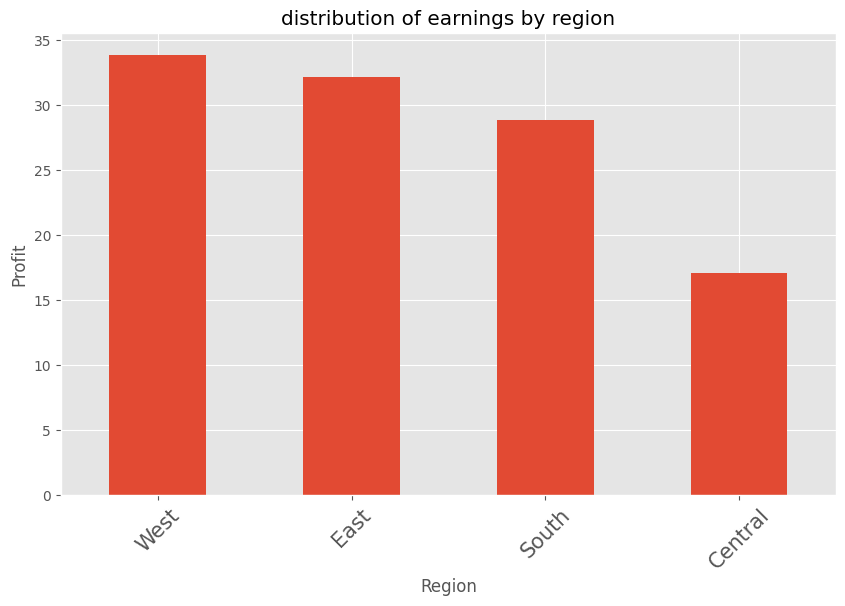

In [10]:

most_gains = df.groupby("Region")["Profit"].mean().sort_values(ascending=False)
print(most_gains)
most_gains.plot(kind="bar", title="distribution of earnings by region")
plt.ylabel("Profit")
plt.xticks(fontsize=15, rotation=45)
plt.show()

> ### 📊 Distribuzione dei guadagni (**Profit**) per regione
> - La regione **West** ha il **miglior profitto medio**, superando di poco la **East**, che segue a ruota.
> - Nonostante le buone vendite, la regione **South** si classifica al terzo posto in termini di redditività.
> - La **Central** è la regione meno redditizia, con un profitto medio significativamente inferiore alle altre.
> ### 💡 Consiglio strategico:
> Ottimizzare i costi logistici potrebbe migliorare significativamente la redditività.

#### -*Ci sono regioni con vendite elevate ma profitti bassi?*

In [11]:
shm_1 = df.groupby("Region")["Sales"].mean().sort_values(ascending=False)
shm_2 = df.groupby("Region")["Profit"].mean().sort_values(ascending=False)
print("-Le Vendite per regione sono:")
print(shm_1)
print("\n-I profiti per regione  sono:")
print(shm_2)

-Le Vendite per regione sono:
Region
South      241.803645
East       238.336110
West       226.493233
Central    215.772661
Name: Sales, dtype: float64

-I profiti per regione  sono:
Region
West       33.849032
East       32.135808
South      28.857673
Central    17.092709
Name: Profit, dtype: float64


> ### Riepilogo - Vendite vs. Profitti per regione
> #### Vendite medie:
> - **South** > East > West > Central
> #### Profitti medi:
> - **West** > East > South > Central
> ### 💡 Conclusione:
> Ci sono delle differenze sproporzionate tra vendite e profitti nelle diverse regioni.

#### -*Perché ci sono queste differenze sproporzionate tra vendite e profitti nelle diverse regioni?*


Region
Central    0.240353
South      0.147253
East       0.145365
West       0.109335
Name: Discount, dtype: float64


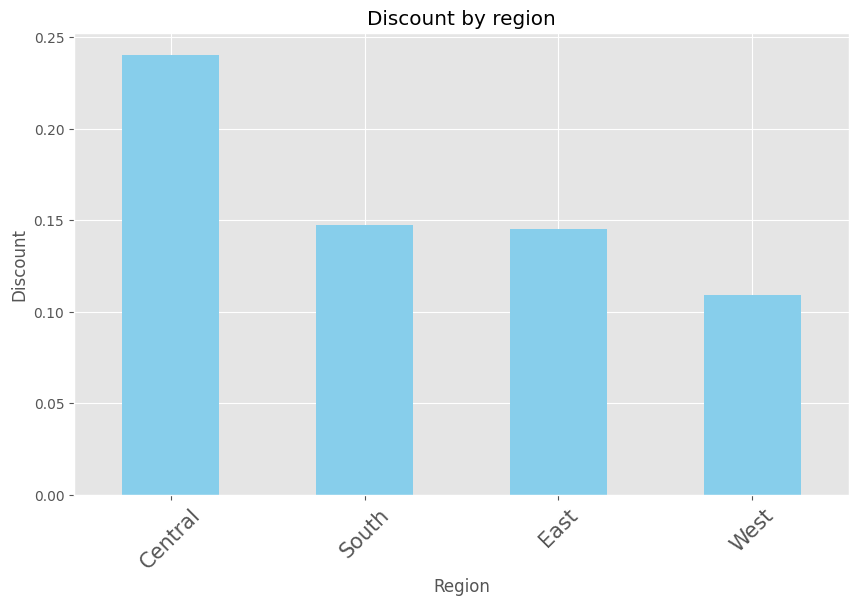

In [12]:
# Analizziamo le riduzioni nelle diverse regioni
scon=df.groupby("Region")["Discount"].mean().sort_values(ascending=False)
print(scon)
scon.plot(kind="bar", title="Discount by region", color="skyBlue")
plt.ylabel("Discount")
plt.xticks( fontsize = 15, rotation=45)
plt.show()


> ### Sconti medi per regione:
> - **Central**: 24,0% (più alto)
> - **South**: 14,7%
> - **East**: 14,5%
> - **West**: 10,9% (più basso)
> ### Profitti medi:
> - **West** > East > South > Central
> ### Interpretazione:
> Le regioni con gli **sconti più alti** (Central e South) hanno anche i **profitti più bassi**, nonostante a volte si registrino buone vendite.
> ### 💡 Consiglio strategico:
> **Ridurre gli sconti eccessivi** in regioni come **Central** e **South**. Una migliore gestione delle promozioni può aumentare i margini senza necessariamente influire sul > > volume delle vendite.

#### -*Qual è l'impatto del tipo di cliente (Segment) per regione?*

In [13]:
print(df["Segment"].value_counts())
pd.crosstab(df["Segment"], df["Region"])

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


Region,Central,East,South,West
Segment,,,,
Consumer,1212,1469,838,1672
Corporate,673,877,510,960
Home Office,438,502,272,571


In [14]:
tab =df.groupby(["Segment","Region"])["Sales"].mean().unstack()
tab

Region,Central,East,South,West
Segment,,,,
Consumer,207.946728,238.875539,233.390180,217.033955
Corporate,234.763466,228.516929,238.992025,235.265911
Home Office,208.248046,253.911805,272.996329,239.442692


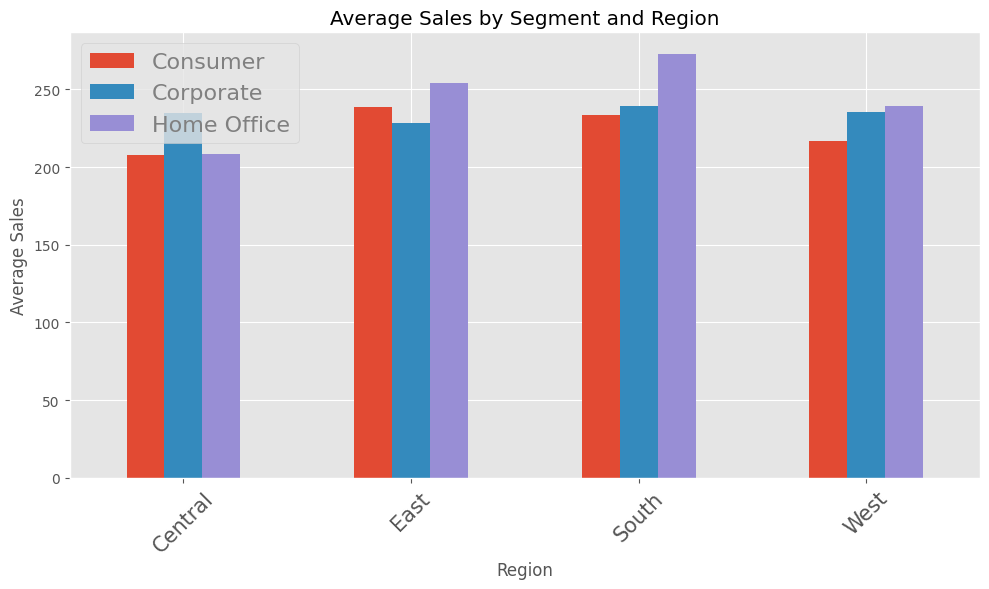

In [15]:
tab.T.plot(kind="bar", figsize=(10,6))
plt.title("Average Sales by Segment and Region")
plt.legend(labelcolor='grey', prop={'size': 16})
plt.xticks(fontsize=15, rotation=45)
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()


> ### 📊 Vendite medie per segmento e regione:
> In media:
> - Il segmento **Home Office** ha registrato le migliori performance nel **South** (273,00) e nell'**East** (253,91).
> - Il segmento **Corporate** rimane stabile e solido in tutte le regioni.
> - Il segmento **Consumer** ha registrato performance più modeste, soprattutto nel **Central**.
> ### 💡 Consiglio:
> Rafforza le campagne **Home Office** nel **South e nell'East**,  dove registrano risultati migliori. Allo stesso tempo, valuta azioni mirate per rafforzare il segmento > > > > **Consumer** nel **Central**, che appare sottoutilizzato.

In [16]:
tab_2 =df.groupby(["Segment","Region"])["Profit"].mean().unstack()
tab_2

Region,Central,East,South,West
Segment,,,,
Consumer,7.066046,28.040153,32.116435,34.360409
Corporate,27.791831,26.935666,29.833771,35.872323
Home Office,28.398202,53.205611,16.987626,28.949939


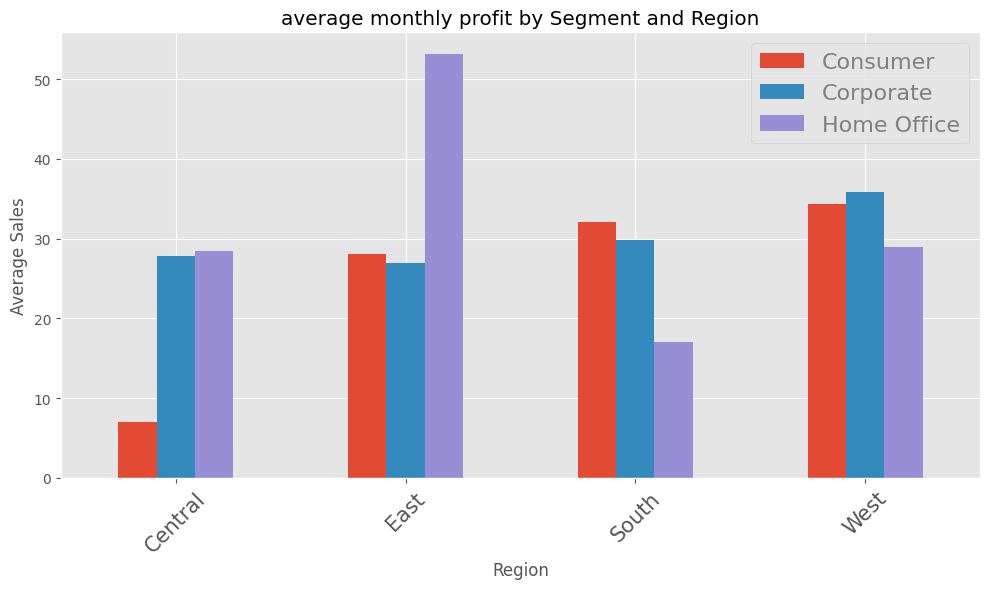

In [17]:
tab_2.T.plot(kind="bar", figsize=(10,6))
plt.title("average monthly profit by Segment and Region")
plt.legend(labelcolor='grey', prop={'size': 16})
plt.xticks(fontsize=15, rotation=45)
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

> ### 💰 Guadagno medio mensile per segmento e regione:
> Il segmento **Home Office** ha registrato il **profitto più elevato** nella regione **Est**, mentre il segmento **Consumer** è stato significativamente meno redditizio nella regione **Centrale**.

#### -*Quali prodotti funzionano meglio in ogni regione*?


🛒 I 10 prodotti più venduti nella regione 'Central' sono:

- Easy-staple paper: 34 unità
- Staples: 31 unità
- Staple envelope: 27 unità
- Tennsco Double-Tier Lockers: 26 unità
- Wilson Jones Turn Tabs Binder Tool for Ring Binders: 24 unità
- High-Back Leather Manager's Chair: 24 unità
- Heavy-Duty E-Z-D Binders: 23 unità
- Acrylic Self-Standing Desk Frames: 21 unità
- GBC Prepunched Paper, 19-Hole, for Binding Systems, 24-lb: 21 unità
- Ibico Plastic Spiral Binding Combs: 20 unità


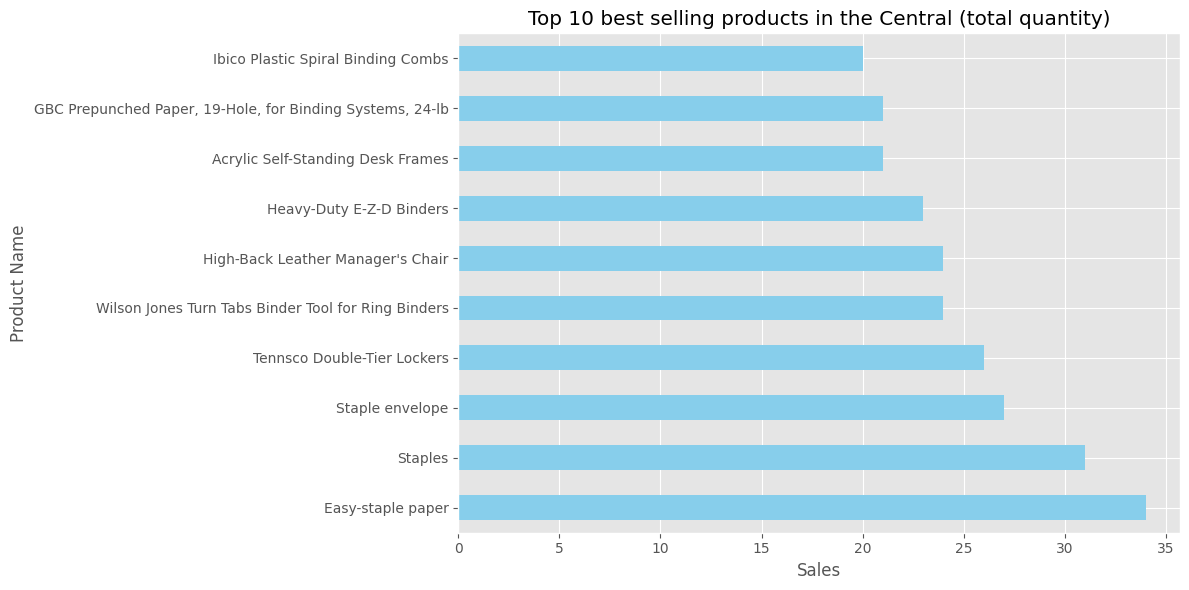

In [18]:

Central_df = df[df["Region"] == "South"]

top_Central_df = Central_df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(10)
top_Central_df

print("\n🛒 I 10 prodotti più venduti nella regione 'Central' sono:\n")
for prodotto, qty in top_Central_df.items():
    print(f"- {prodotto}: {qty} unità")

plt.figure(figsize=(12, 6))
top_Central_df.plot(kind="barh", color = "skyblue")
plt.title("Top 10 best selling products in the Central (total quantity)")
plt.xlabel("Sales")
plt.tight_layout()
plt.show()


🛒 I 10 prodotti più venduti nella regione 'West' sono:

- Easy-staple paper: 34 unità
- Staples: 31 unità
- Staple envelope: 27 unità
- Tennsco Double-Tier Lockers: 26 unità
- Wilson Jones Turn Tabs Binder Tool for Ring Binders: 24 unità
- High-Back Leather Manager's Chair: 24 unità
- Heavy-Duty E-Z-D Binders: 23 unità
- Acrylic Self-Standing Desk Frames: 21 unità
- GBC Prepunched Paper, 19-Hole, for Binding Systems, 24-lb: 21 unità
- Ibico Plastic Spiral Binding Combs: 20 unità


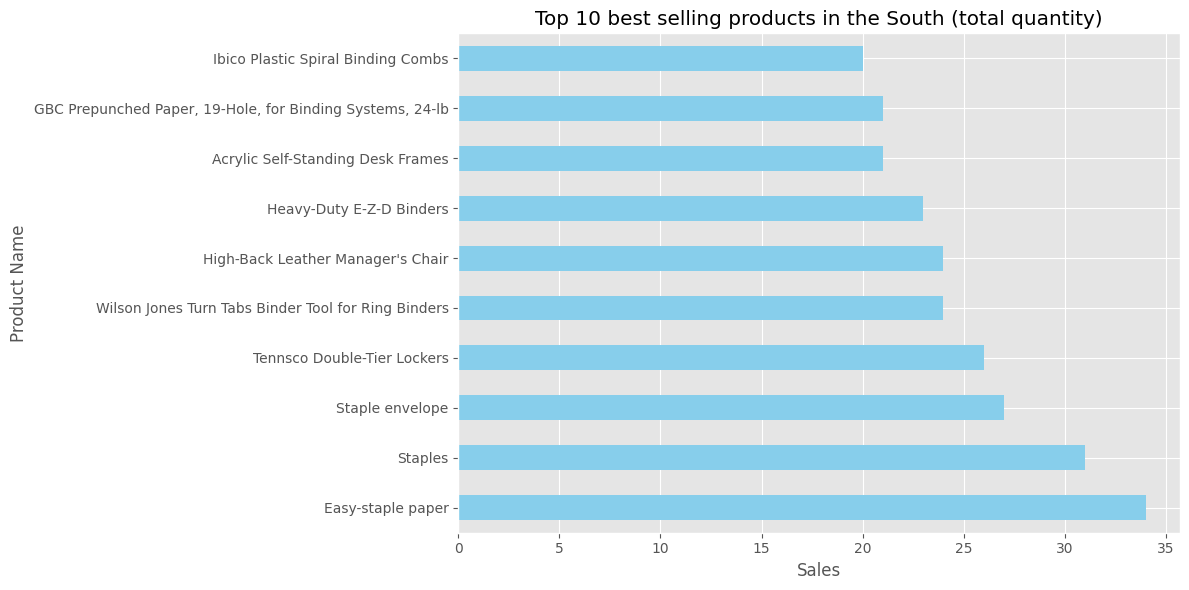

In [19]:

South_df = df[df["Region"] == "South"]

top_South_df = South_df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(10)
top_South_df

print("\n🛒 I 10 prodotti più venduti nella regione 'West' sono:\n")
for prodotto, qty in top_South_df.items():
    print(f"- {prodotto}: {qty} unità")

plt.figure(figsize=(12, 6))
top_South_df.plot(kind="barh", color = "skyblue")
plt.title("Top 10 best selling products in the South (total quantity)")
plt.xlabel("Sales")
plt.tight_layout()
plt.show()


🛒 I 10 prodotti più venduti nella regione 'West' sono:

- Staples: 43 unità
- Easy-staple paper: 35 unità
- Wilson Jones Clip & Carry Folder Binder Tool for Ring Binders, Clear: 32 unità
- Staple envelope: 32 unità
- Cardinal EasyOpen D-Ring Binders: 31 unità
- Eldon Wave Desk Accessories: 30 unità
- Logitech P710e Mobile Speakerphone: 29 unità
- Vinyl Sectional Post Binders: 29 unità
- Eldon Shelf Savers Cubes and Bins: 29 unità
- Dana Halogen Swing-Arm Architect Lamp: 28 unità


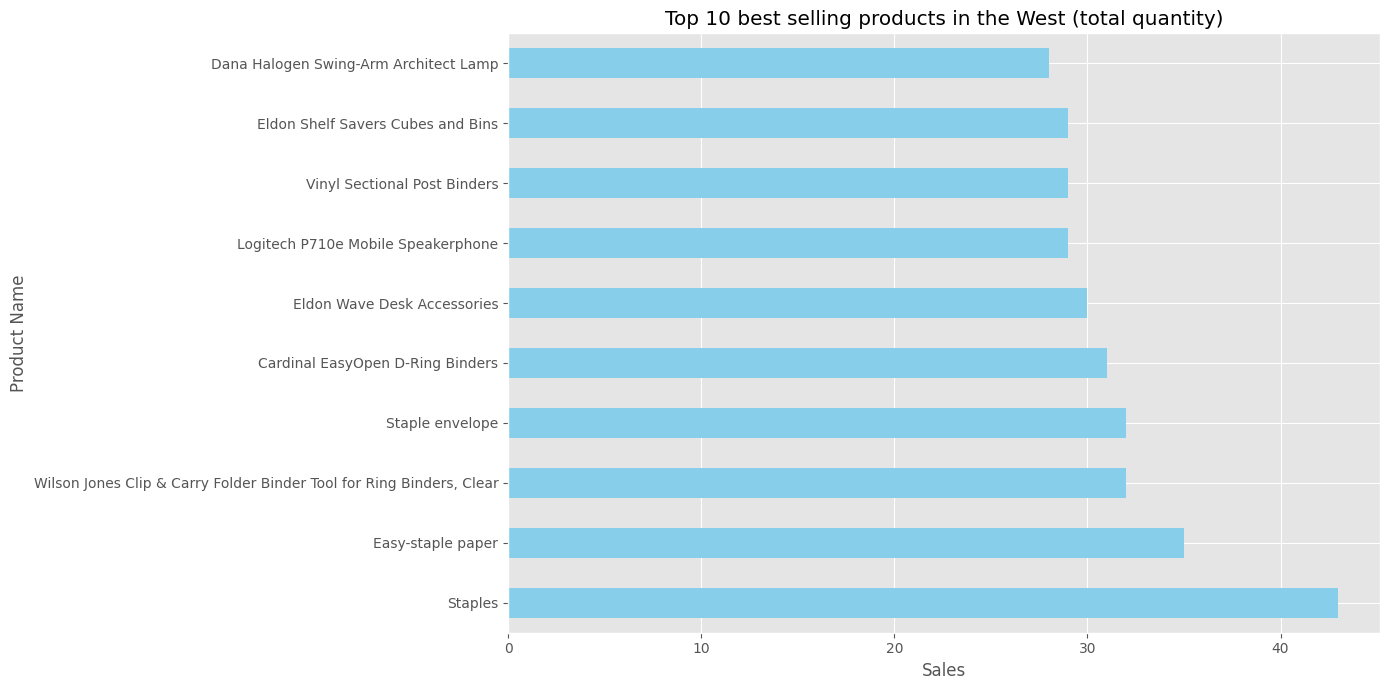

In [20]:

West_df = df[df["Region"] == "West"]

top_West_df = West_df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(10)
top_West_df

print("\n🛒 I 10 prodotti più venduti nella regione 'West' sono:\n")
for prodotto, qty in top_West_df.items():
    print(f"- {prodotto}: {qty} unità")

plt.figure(figsize=(14, 7))
top_West_df.plot(kind="barh", color="skyblue")
plt.title("Top 10 best selling products in the West (total quantity)")
plt.xlabel("Sales")
plt.tight_layout()
plt.show()


🛒 I 10 prodotti più venduti nella regione 'East' sono:

- Staples: 71 unità
- Staple envelope: 68 unità
- Easy-staple paper: 41 unità
- Fellowes PB200 Plastic Comb Binding Machine: 32 unità
- OIC Colored Binder Clips, Assorted Sizes: 31 unità
- Dual Level, Single-Width Filing Carts: 29 unità
- GBC Premium Transparent Covers with Diagonal Lined Pattern: 28 unità
- PureGear Roll-On Screen Protector: 27 unità
- Storex Dura Pro Binders: 26 unità
- Situations Contoured Folding Chairs, 4/Set: 26 unità


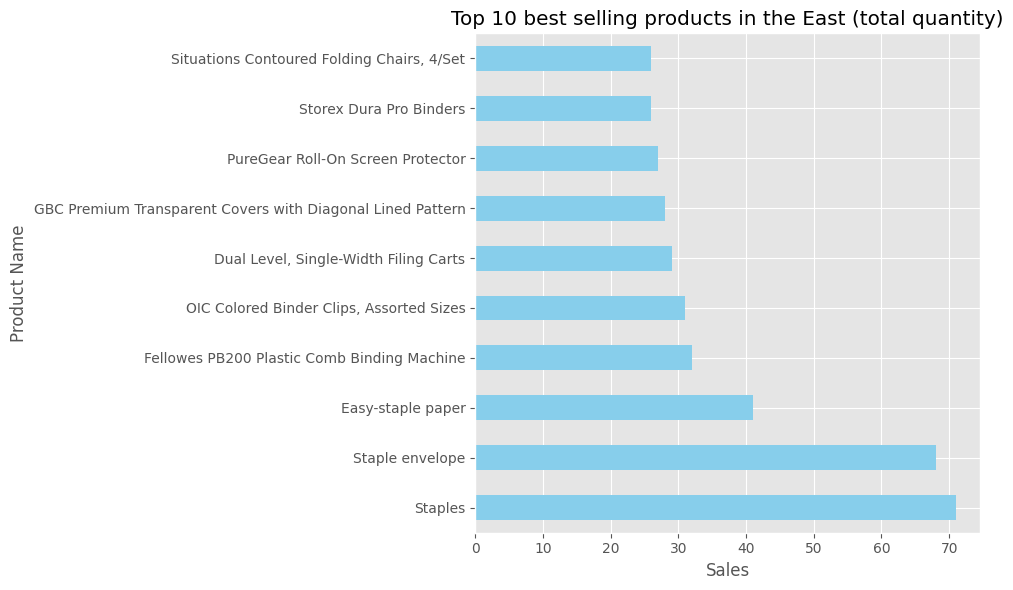

In [21]:

east_df = df[df["Region"] == "East"]

top_East_df = east_df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(10)
top_East_df

print("\n🛒 I 10 prodotti più venduti nella regione 'East' sono:\n")
for prodotto, qty in top_East_df.items():
    print(f"- {prodotto}: {qty} unità")

plt.figure(figsize=(10, 6))
top_East_df.plot(kind="barh", color="skyblue")
plt.title("Top 10 best selling products in the East (total quantity)")
plt.xlabel("Sales")
plt.tight_layout()
plt.show()

#### -*Quali categorie generano il maggior numero di vendite?*

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64



💰vendite effettuate per categoria:
Category
Technology         452.709276
Furniture          349.834887
Office Supplies    119.324101
Name: Sales, dtype: float64


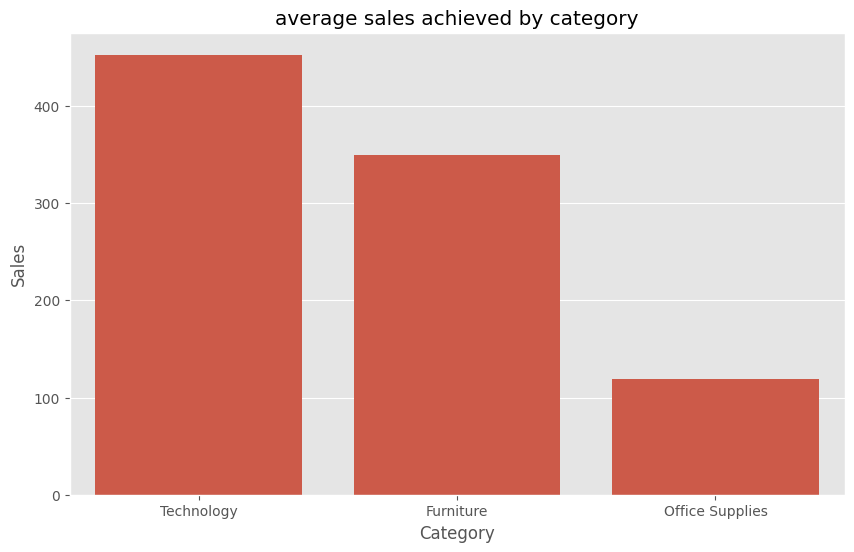


📈benefici realizzati per categorie:
Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


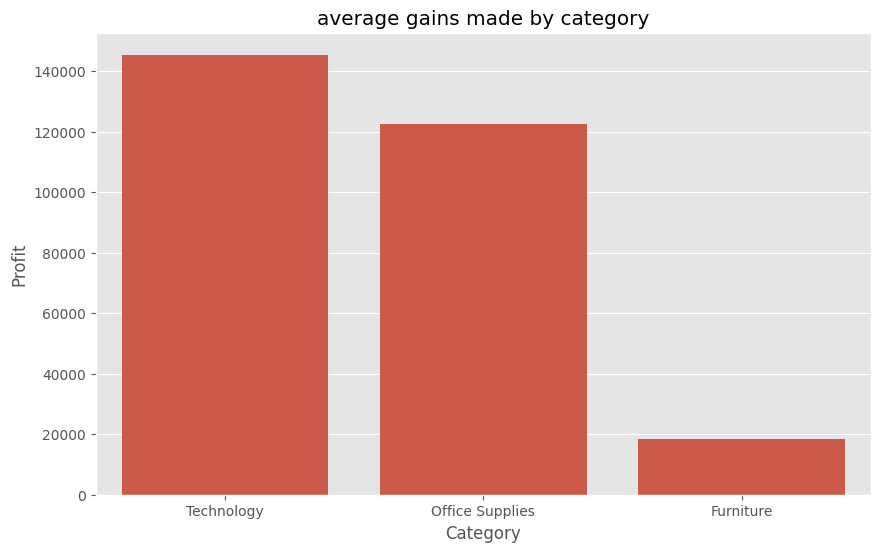

In [22]:

print(df["Category"].value_counts())
print("\n")
print("\n💰vendite effettuate per categoria:")
shm_ = df.groupby("Category")["Sales"].mean().sort_values(ascending=False)
print(shm_)
plt.figure(figsize=(10, 6))
sns.barplot(shm_)
plt.title("average sales achieved by category")
plt.show()

print("\n📈benefici realizzati per categorie:")
shm__ = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
print(shm__)
plt.figure(figsize=(10, 6))
sns.barplot(shm__)
plt.title("average gains made by category")
plt.show()

> ### 📈 Vendite e profitti medi per categoria
> - La categoria **Technology** è in testa sia nelle vendite che nei profitti medi.
> - La categoria **Office Supplies** genera meno vendite rispetto all'Arredamento, ma un profitto medio più elevato.
> - La categoria **Furniture** registra vendite discrete ma un profitto medio basso, il che potrebbe indicare margini ridotti.

#### -*Quali Sub-Category generano il maggior numero di vendite?*

In [23]:

print(df["Sub-Category"].value_counts())

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64



💰vendite effettuate per Sub-Category:

Sub-Category
Copiers        2198.941618
Machines       1645.553313
Tables          648.794771
Chairs          532.332420
Bookcases       503.859633
Phones          371.211534
Storage         264.590553
Supplies        245.650200
Appliances      230.755710
Accessories     215.974604
Binders         133.560560
Furnishings      95.825668
Envelopes        64.867724
Paper            57.284092
Labels           34.303055
Art              34.068834
Fasteners        13.936774
Name: Sales, dtype: float64


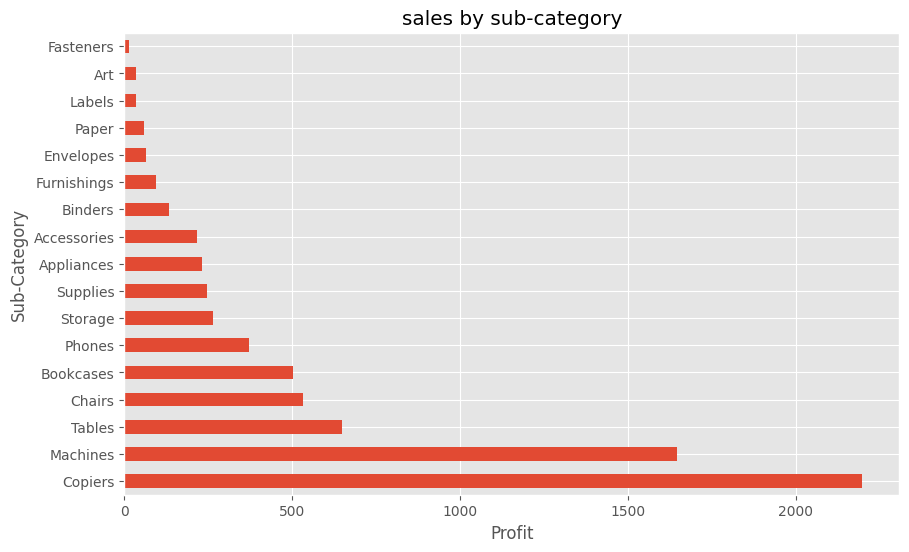


📈benefici realizzati per Sub-Category:

Sub-Category
Copiers        817.909190
Accessories     54.111788
Phones          50.073938
Chairs          43.095894
Appliances      38.922758
Machines        29.432669
Envelopes       27.418019
Storage         25.152277
Paper           24.856620
Binders         19.843574
Labels          15.236962
Furnishings     13.645918
Art              8.200737
Fasteners        4.375660
Supplies        -6.258418
Bookcases      -15.230509
Tables         -55.565771
Name: Profit, dtype: float64


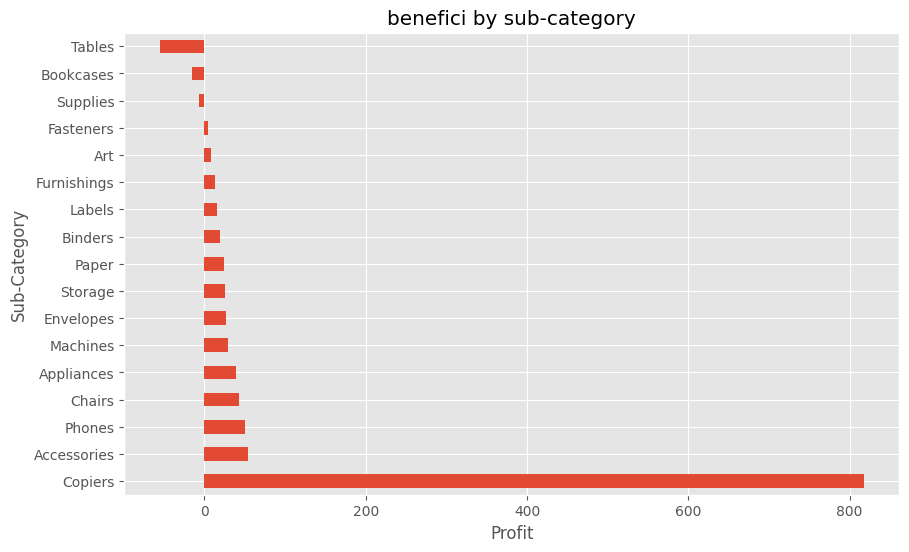

In [24]:

print("\n💰vendite effettuate per Sub-Category:\n")
sub_c = df.groupby("Sub-Category")["Sales"].mean().sort_values(ascending=False)
print(sub_c)
sub_c.plot(kind="barh", title="sales by sub-category")
plt.xlabel("Profit")
plt.show()

print("\n📈benefici realizzati per Sub-Category:\n")
sub_c2 = df.groupby("Sub-Category")["Profit"].mean().sort_values(ascending=False)
print(sub_c2)
sub_c2.plot(kind="barh", title="benefici by sub-category")
plt.xlabel("Profit")
plt.show()

> ### Riepilogo vendite e profitti per Sub-Category
> - **Copiers**: Leader indiscussi, sia in termini di vendite che di profitti → prodotto chiave.
> - **Machines**: Vendite elevate ma profitti molto più modesti → margine basso.
> - ⚠️**Table, Bookcases, Supplies**: Vendite intermedie ma addirittura negativa.

> ➡️ **Conclusione:** La performance complessiva dipende fortemente di **Copiers** . Alcune categorie vendono molto ma generano pochi ricavi, il che richiede un adeguamento della strategia (prezzo, costi o priorità o **Discount**).

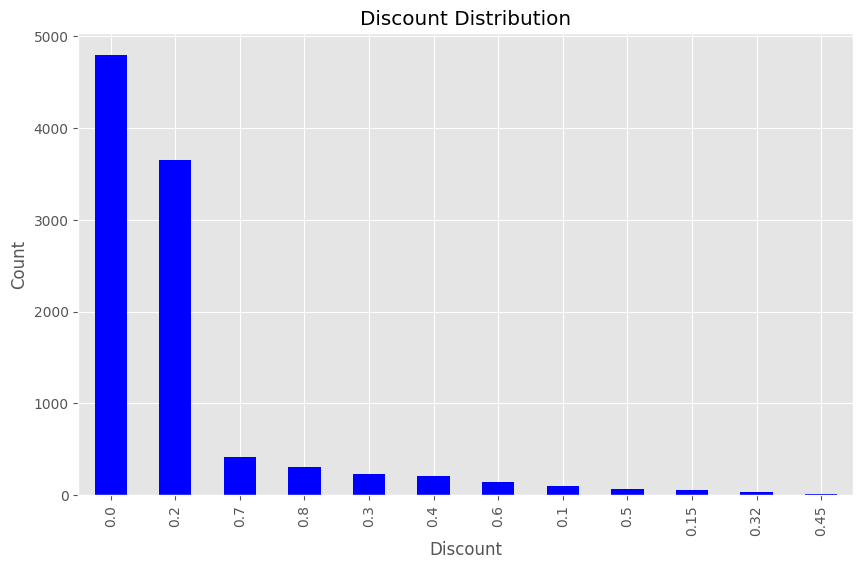

In [25]:
df["Discount"].value_counts().plot(kind="bar", title="Discount Distribution", color = "blue")
plt.ylabel("Count")
plt.show()

> ### Distribuzione degli sconti
> - La maggior parte delle vendite viene effettuata **senza sconto (0%)** o con uno sconto moderato di circa il **20%**.
> - Sconti elevati (≥ 50%) sono **rari**, ma esistono.
> - Alcuni casi estremi di sconti molto elevati (≥ 70%) 🚨 possono rappresentare un **rischio di perdita significativa** se non controllati.

> ➡️ **Conclusione:** La politica degli sconti è generalmente concentrata, ma gli sconti eccessivi devono essere monitorati per evitare l'erosione dei margini.

### 

I Sub-Category in perdita sono:

Sub-Category
Supplies     -6.258418
Bookcases   -15.230509
Tables      -55.565771
Name: Profit, dtype: float64


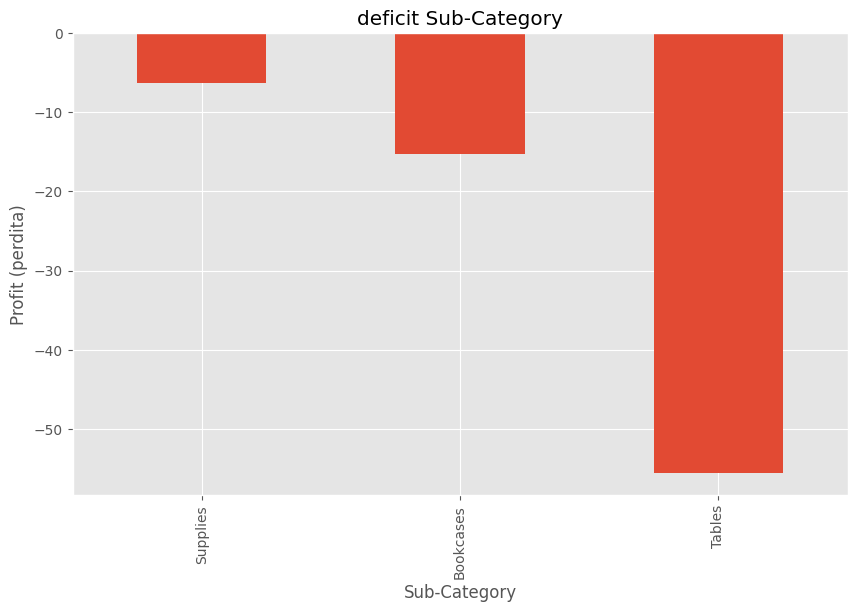

In [26]:
print("I Sub-Category in perdita sono:\n")
perd = sub_c2[sub_c2 < 0]
print(perd)
plt.figure(figsize=(10,6))
perd.plot(kind="bar", title="deficit Sub-Category")
plt.ylabel("Profit (perdita)")
plt.show()


#### -*Quali sono le vendite (**Sales**) / utili (**Profit**) in ogni regione in base alle categorie?*

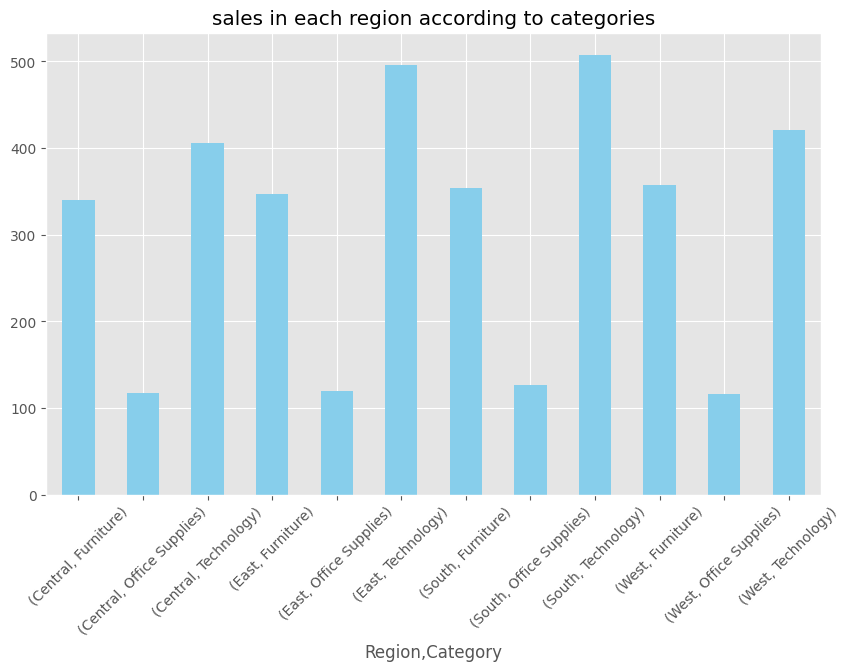

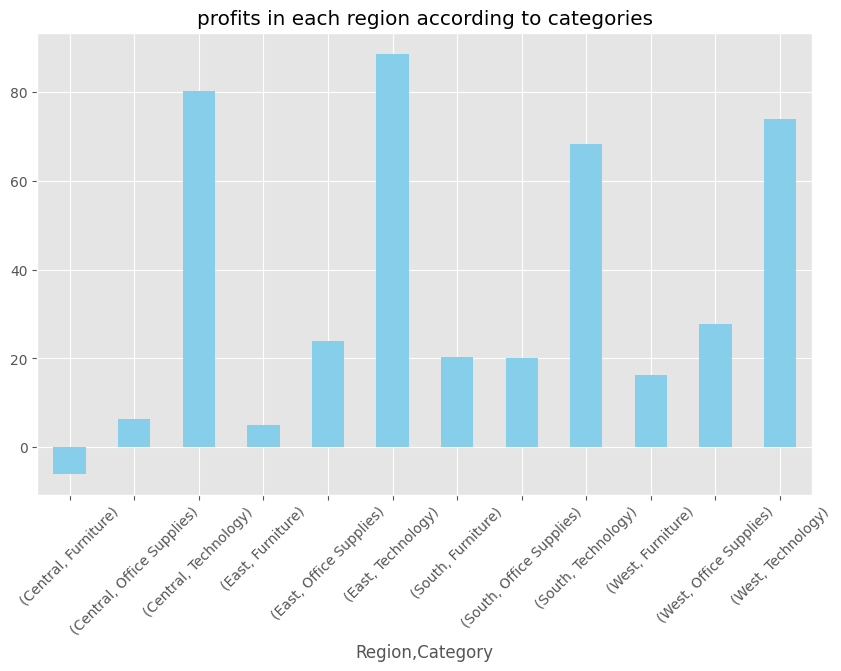

In [27]:
df.groupby(["Region", "Category"])["Sales"].mean().plot(kind="bar", title="sales in each region according to categories", color="skyblue")
plt.xticks(fontsize=10, rotation=45)
plt.show()
df.groupby(["Region", "Category"])["Profit"].mean().plot(kind="bar", title="profits in each region according to categories", color="skyblue")
plt.xticks(fontsize=10, rotation=45)
plt.show()

> - ⚠️ **"Furniture" nella regione Central è in perdita**:
> - Sebbene le vendite siano moderate (~340), i profitti sono **negativi**.
> - Ciò indica **costi elevati o sconti eccessivi**.

>   ##  ? 🔍*analizziamo questo*:

In [28]:
print(df.groupby(["Category","Region"])["Discount"].mean().unstack())
print("\n")
df.groupby(["Category","Region"])["Sales"].mean().unstack()

Region            Central      East     South      West
Category                                               
Furniture        0.297380  0.154077  0.121536  0.131400
Office Supplies  0.252743  0.142932  0.167437  0.093358
Technology       0.133095  0.143364  0.107850  0.133890




Region,Central,East,South,West
Category,,,,
Furniture,340.534644,346.574383,353.309289,357.302325
Office Supplies,117.458801,120.044425,126.282727,116.422377
Technology,405.753124,495.278469,507.753952,420.687533


Segment                  Consumer  Corporate  Home Office
Region  Category                                         
Central Furniture             255        137           89
        Office Supplies       739        417          266
        Technology            218        119           83
East    Furniture             303        198          100
        Office Supplies       888        520          304
        Technology            278        159           98
South   Furniture             180        101           51
        Office Supplies       505        324          166
        Technology            153         85           55
West    Furniture             375        210          122
        Office Supplies       995        559          343
        Technology            302        191          106

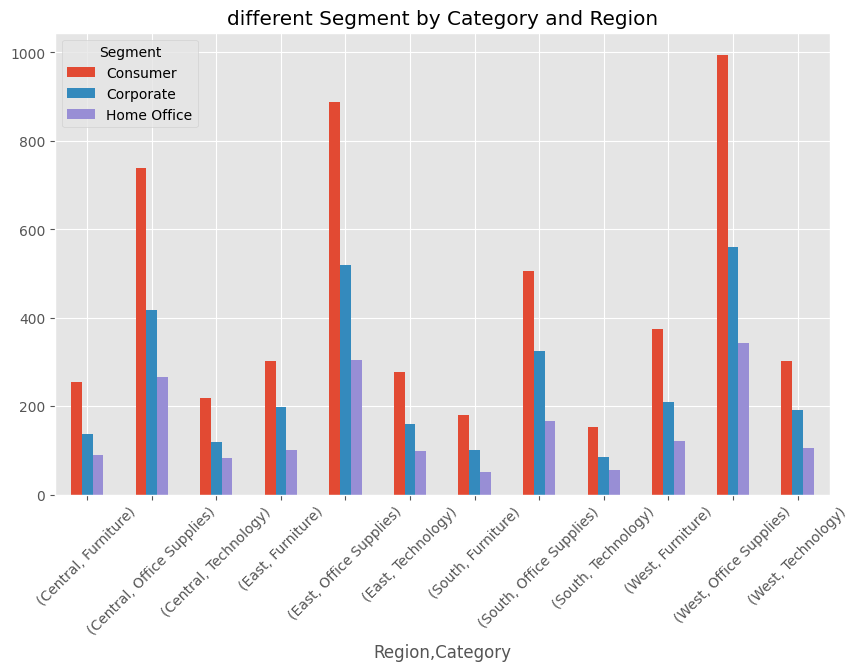

In [29]:
c = pd.crosstab([df["Region"],df["Category"]], df["Segment"])
c.plot(kind="bar", title="different Segment by Category and Region")
plt.xticks(fontsize=10, rotation=45)
c

-la quantità media ordinata (Quantity) per Sub-Category nel centro è:

Sub-Category
Bookcases      3.840000
Chairs         3.993506
Furnishings    3.697561
Tables         3.638889
Name: Quantity, dtype: float64


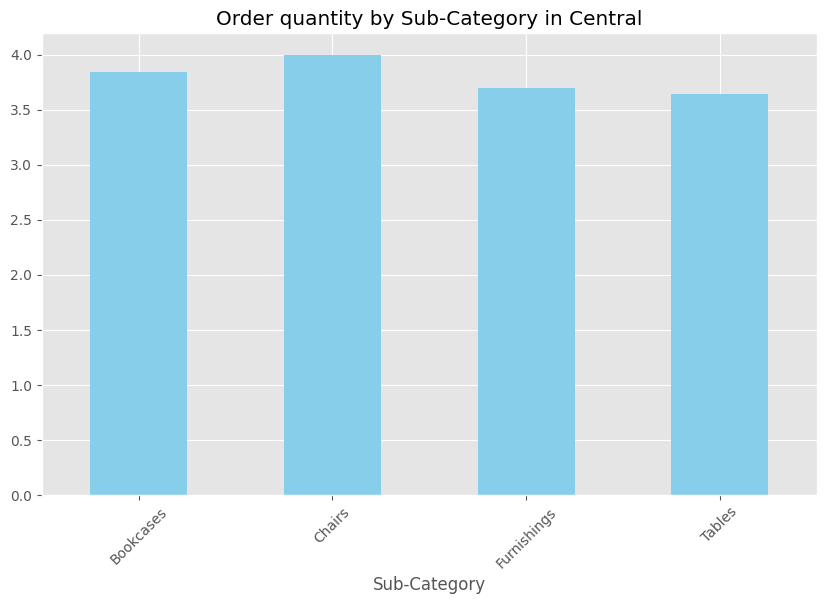

-guadagni medi (Profit) per Sub-Category nel centro è
:
Sub-Category
Bookcases     -39.958086
Chairs         42.809884
Furnishings   -19.054716
Tables        -49.439589
Name: Profit, dtype: float64


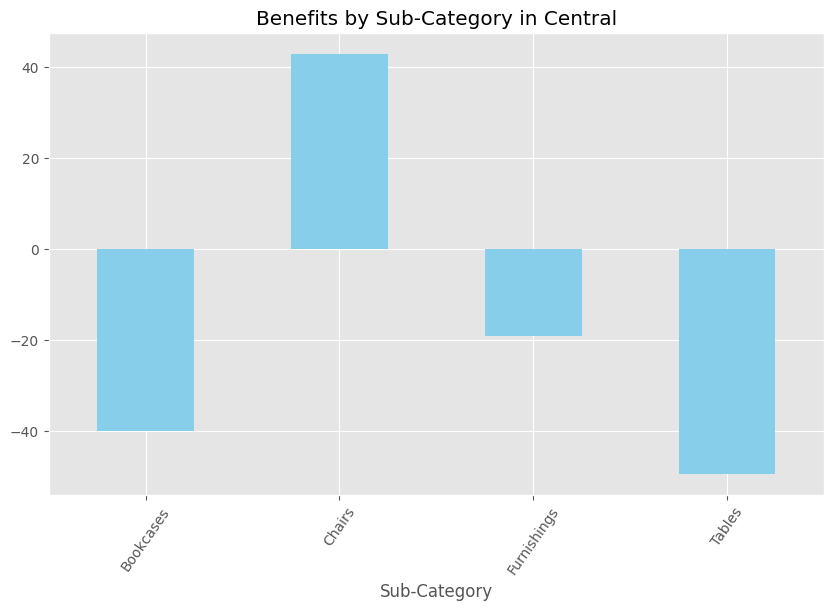

In [30]:
v= df[(df["Region"] == "Central") & (df["Category"] == "Furniture")].groupby("Sub-Category")["Quantity"].mean()
print("-la quantità media ordinata (Quantity) per Sub-Category nel centro è:\n")
print(v)
v.plot(kind="bar", title="Order quantity by Sub-Category in Central", color="skyblue")
plt.xticks(fontsize=10, rotation=45)
plt.show()

plt.Figure(figsize=(10,6))
v2 = df[(df["Region"] == "Central") & (df["Category"] == "Furniture")].groupby("Sub-Category")["Profit"].mean()
print("-guadagni medi (Profit) per Sub-Category nel centro è\n:")
print(v2)
v2.plot(kind="bar", title="Benefits by Sub-Category in Central", color="skyblue")
plt.xticks(fontsize=10, rotation=55)
plt.show()                                                                                           

> ## 📊 Analisi dei mobili (**Chairs**) venduti nella regione Centrale (Central)
> ### ✅ Quantità ordinata:
> - I prodotti più ordinati sono **Bookcases** e **Chairs**.
> - **Furnishings** e **Tables** sono i meno ordinati.
> ### 💰 Profitti realizzati:
> - Solo le **Chairs** generano profitti.
> - Le altre sottocategorie (**Furnishings**, **Tables**, **Bookcases**) stanno perdendo denaro.
> ### 🔚 Conclusione:
> 🔍 È quindi a causa di **Furnishings**, **Tables**, **Bookcases** che abbiamo un *deficit* nella zona **central** per la **Furniture** . 
> *Vendere molto non significa sempre guadagnare*. Bisogna concentrarsi sui prodotti **che fanno davvero guadagnare**, come le **Chairs**, e **esaminare quelli che causano perdite**.


#### -*Esiste una relazione tra quantità venduta e sconto?*

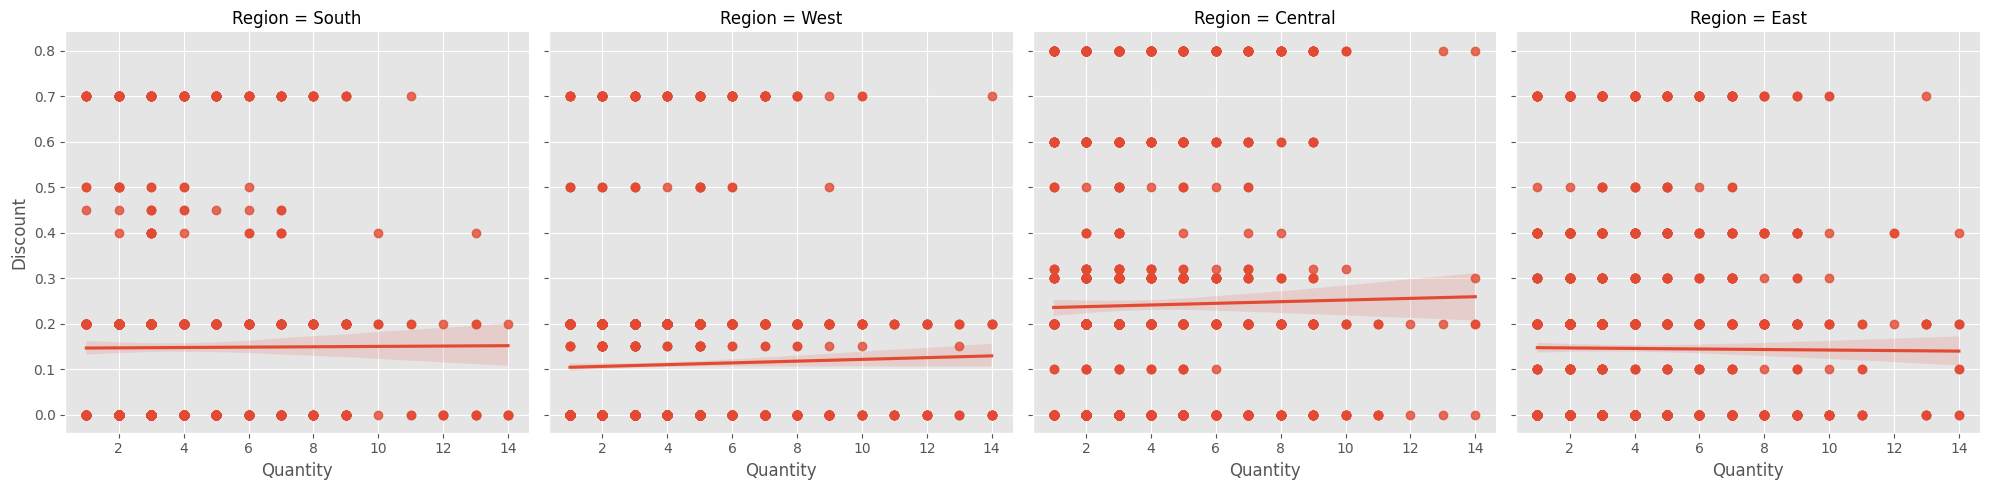

In [31]:

# x = df.groupby("Quantity")["Discount"].mean()
# y = df["Quantity"].value_counts().sort_values(ascending=True)

sns.lmplot(x="Quantity", y="Discount", col="Region",data=df)
plt.show()

> ### Relazione tra Quantità e Sconto per Regione
> - Le linee di regressione in tutte le regioni sono **quasi piatte** → **correlazione trascurabile.**  
> - Gli sconti sono applicati in **blocchi fissi (0%, 20%, 30%, 70%...)**, non proporzionali alle quantità.  
> - Non emerge alcuna differenza sostanziale tra le diverse regioni.  

> ➡️ **Conclusione:** La quantità acquistata **non influenza** il livello di sconto. Le regole di pricing sembrano definite a priori e non legate al volume.


# 📊 Conclusione Generale 

### 1. Prodotti e redditività
- Il business è fortemente trainato da **Copiers**, che rappresentano sia il volume di vendite che i profitti più elevati → prodotto chiave da proteggere e valorizzare.  
- Alcune sottocategorie (**Machines**) vendono molto ma con margini ridotti, mentre altre (**Tables, Bookcases, Furnishings, Supplies**) 🚨 generano perdite nonostante un volume discreto.  
- Nel comparto **Furniture**, solo le **Chairs** sono profittevoli; gli altri articoli sono fonte di deficit.  
➡️ *Serve una riallocazione strategica: ridurre focus su prodotti in perdita e potenziare quelli ad alto margine.*

---

### 2. Politica degli sconti
- La maggior parte delle vendite avviene senza sconto o con uno sconto moderato (~20%).  
- Tuttavia, esistono **casi estremi ≥ 70% 🚨** che mettono a rischio la redditività.  
- La relazione tra quantità acquistata e sconto è **inesistente**: le riduzioni seguono regole fisse e non incentivi di volume.  
➡️ *Una revisione della politica sconti è necessaria: eliminare gli sconti eccessivi e allineare le promozioni agli obiettivi di margine.*

---

### 3. Analisi regionale
- **Vendite**: la regione **South** guida le vendite, seguita da East, mentre **Central** è la più debole.  
- **Profitti**: la regione **West** è la più redditizia, seguita da East; **South** ha buone vendite ma margini limitati; **Central** è la meno performante con profitti negativi in alcune categorie.  
- Differenze marcate tra vendite e profitti mostrano inefficienze locali, soprattutto in **Central** e **South**, legate a **sconti e costi elevati**.  
➡️ *Occorre una strategia regionale mirata: rafforzare Home Office in South/East, riequilibrare il Consumer nel Central e ottimizzare i costi logistici.*

---

### 4. Logistica
- Il metodo di spedizione **Standard Class** è dominante in tutte le regioni (~60%), a conferma di una preferenza generale per l’economicità.  
- **Same Day** è marginale, segno che la rapidità non è un driver di acquisto principale.  
➡️ *Il mix logistico è coerente ma potrebbe nascondere opportunità di upselling su fasce premium.*

---

## 🔑 Sintesi Strategica
- **Dipendenza critica da pochi prodotti (Copiers)**: diversificare la redditività è fondamentale.  
- **Prodotti in perdita 🚨** (Tables, Bookcases, Supplies, parte del Furniture) devono essere rivalutati: riduzione, rinegoziazione costi o aumento prezzi.  
- **Politica sconti** da controllare meglio: stop agli sconti estremi e maggiore allineamento agli obiettivi di profitto.  
- **Differenze regionali** richiedono strategie su misura: potenziare segmenti vincenti (Home Office in South/East) e correggere inefficienze (Central).  
- **Logistica** stabile e orientata al risparmio, ma con margini di sviluppo su segmenti premium.  

➡️ **Conclusione finale:** L’azienda ha un modello di business solido grazie ad alcuni prodotti chiave e alla stabilità logistica, ma soffre di dipendenza da pochi driver di profitto e di perdite localizzate. Un’azione combinata su prodotti, sconti e strategie regionali può aumentare sensibilmente la redditività complessiva.
